In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

# Path to the Parquet file
parquet_file_path = 'C:/Users/ASCStudent/Desktop/classes/CIS 4130/project/m5/combined_data.parquet'

# Read the Parquet file into a Pandas DataFrame
df = pd.read_parquet(parquet_file_path)

# Filter out rows with negative average passenger count or average tip amount
df = df[(df['avg(passenger_count)'] > 0) & (df['avg(tip_amount)'] >= 0) & (df['avg(total_amount)'] >= 0)]

# Convert specific columns to integer data type
df['pickup_hour'] = df['pickup_hour'].astype(int)
df['pickup_year'] = df['pickup_year'].astype(int)
df['pickup_month'] = df['pickup_month'].astype(int)

# Replace values in 'Pickup_Borough' column with better descriptors
df['Pickup_Borough'] = df['Pickup_Borough'].replace('N/A', 'Outside City')
df['Pickup_Borough'] = df['Pickup_Borough'].replace('Unknown', 'Outside City')
df['Pickup_Borough'] = df['Pickup_Borough'].replace('EWR', 'Newark')

#Filter DataFrame to remove pickup_year after 2024 and before 2011
df = df[(df['pickup_year'] >= 2011) & (df['pickup_year'] <= 2023)]

# Display column names and their data types
#print(df.dtypes)

# To save the DataFrame as a csv and parquet
df.to_csv('combined_data.csv', index=False)
df.to_parquet('combined_data.parquet', index=False)

# Path to the Parquet file
csv_file_path = 'C:/Users/ASCStudent/Desktop/classes/CIS 4130/project/m5/combined_data.csv'

# Read the Parquet file into a Pandas DataFrame
df = pd.read_csv(csv_file_path)

In [46]:
# Path to the Parquet file
parquet_file_path = 'C:/Users/ASCStudent/Desktop/classes/CIS 4130/project/m5/combined_data.parquet'

# Read the Parquet file into a Pandas DataFrame
df = pd.read_parquet(parquet_file_path)

In [47]:
df.head()

,Pickup_Borough,pickup_hour,pickup_year,pickup_month,avg(passenger_count),avg(tip_amount),avg(total_amount),count(1)
0,Brooklyn,19,2015,10,1.327515,1.589754,15.307177,974
1,Staten Island,16,2015,10,2.000000,1.960000,11.760000,1
2,Bronx,7,2015,10,1.116279,0.714419,14.774884,43
3,Outside City,12,2015,10,1.352941,0.426471,37.729412,17
4,Queens,19,2015,10,1.370271,2.347276,38.197631,2617


In [48]:
df.describe()

,pickup_hour,pickup_year,pickup_month,avg(passenger_count),avg(tip_amount),avg(total_amount),count(1)
count,295011.000000,295011.000000,295011.000000,295011.000000,295011.000000,295011.000000,295011.000000
mean,11.659223,2016.935409,6.388084,1.259193,1.067632,26.545361,3846.638186
std,6.856546,3.890228,3.442303,0.249369,0.927261,40.570745,11311.256535
min,0.000000,2011.000000,1.000000,0.250000,0.000000,0.000000,1.000000
25%,6.000000,2013.000000,3.000000,1.142857,0.487097,13.172500,10.000000
50%,12.000000,2017.000000,6.000000,1.250000,0.934444,17.225000,73.000000
75%,18.000000,2020.000000,9.000000,1.333333,1.452000,27.122122,846.000000
max,23.000000,2023.000000,12.000000,4.000000,29.175000,15936.708571,71208.000000


## Passenger counts by borough over different time metrics 

In [49]:
for i in ['hour','month','year']:
    # Group the DataFrame
    passenger_counts = df.groupby([f'pickup_{i}', 'Pickup_Borough'])['avg(passenger_count)'].mean().unstack()

    # Plot the data
    fig = px.line(passenger_counts, x=passenger_counts.index, y=passenger_counts.columns, title=f'Passenger Counts by {i.capitalize()} and Borough')
    fig.update_xaxes(title=f'Pickup {i.capitalize()}')
    fig.update_yaxes(title='Passenger Count')

    # Set clear background
    fig.update_layout(plot_bgcolor='white', paper_bgcolor='white')

    # Make legend clickable
    fig.update_layout(legend=dict(itemclick='toggle'))
    
    # Set legend title
    fig.update_layout(legend=dict(title='Borough'))

    # Show the plot
    fig.show()

## Average price based on borough and in totality over time

In [54]:
for i in ['hour','month','year']:
    # Calculate average total amount based on borough
    avg_total_amount_borough = df.groupby([f'pickup_{i}', 'Pickup_Borough'])['avg(total_amount)'].mean().reset_index()

    # Calculate overall average total amount over time
    avg_total_amount_overall = df.groupby(f'pickup_{i}')['avg(total_amount)'].mean().reset_index()
    avg_total_amount_overall['Pickup_Borough'] = 'On average'

    # Concatenate both DataFrames
    avg_total_amount = pd.concat([avg_total_amount_borough, avg_total_amount_overall])

    # Plot average total amount based on borough and overall over time
    fig = px.line(avg_total_amount, x=f'pickup_{i}', y='avg(total_amount)', color='Pickup_Borough', 
                  title=f'Average Total Cost Based on Borough by {i}')
    fig.update_xaxes(title=f'Pickup {i.capitalize()}')
    fig.update_yaxes(title='Average Total Amount')

    # Set clear background
    fig.update_layout(plot_bgcolor='white', paper_bgcolor='white')
    
    # Set legend title
    fig.update_layout(legend=dict(title='Borough'))

    # Show the plot
    fig.show()

## Numbers of trips over different time metrics.

In [55]:
for i in ['hour', 'month', 'year']:
    # Calculate number of trips based on borough
    num_trips_borough = df.groupby([f'pickup_{i}', 'Pickup_Borough'])['count(1)'].sum().reset_index()

    # Calculate overall number of trips over time
    num_trips_overall = df.groupby(f'pickup_{i}')['count(1)'].sum().reset_index()
    num_trips_overall['Pickup_Borough'] = 'On average'

    # Concatenate both DataFrames
    num_trips = pd.concat([num_trips_borough, num_trips_overall])

    # Plot number of trips based on borough and overall over time
    fig = px.line(num_trips, x=f'pickup_{i}', y='count(1)', color='Pickup_Borough', 
                  title=f'Number of Trips Based on Borough by {i}')
    fig.update_xaxes(title=f'Pickup {i.capitalize()}')
    fig.update_yaxes(title='Number of Trips')

    # Set clear background
    fig.update_layout(plot_bgcolor='white', paper_bgcolor='white')
    
    # Set legend title
    fig.update_layout(legend=dict(title='Borough'))

    # Show the plot
    fig.show()

## Trend of tip amounts vs. total price over time

In [56]:
for i in ['hour', 'month', 'year']:
    # Calculate average tip amount and average total price based on time interval
    tip_total_trend = df.groupby(f'pickup_{i}').agg({'avg(tip_amount)': 'mean', 'avg(total_amount)': 'mean'}).reset_index()

    # Plot tip amount vs. total price over time
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=tip_total_trend[f'pickup_{i}'], y=tip_total_trend['avg(tip_amount)'], mode='lines', name='Average Tip Amount'))
    fig.add_trace(go.Scatter(x=tip_total_trend[f'pickup_{i}'], y=tip_total_trend['avg(total_amount)'], mode='lines', name='Average Total Price'))

    # Update layout
    fig.update_layout(title=f'Trend of Tip Amounts vs. Total Price Over Time by {i.capitalize()}',
                      xaxis_title=f'Pickup {i.capitalize()}',
                      yaxis_title='Amount',
                      legend_title='Metrics')
    
    # Set clear background
    fig.update_layout(plot_bgcolor='white', paper_bgcolor='white')

    # Show plot
    fig.show()

In [57]:
for i in ['hour', 'month', 'year']:
    # Calculate average tip amount and average total price based on time interval
    tip_total_trend = df.groupby(f'pickup_{i}').agg({'avg(tip_amount)': 'mean', 'avg(total_amount)': 'mean'}).reset_index()

    # Calculate percentage change for average tip amount and average total price
    tip_total_trend['tip_amount_change'] = tip_total_trend['avg(tip_amount)'].pct_change() * 100
    tip_total_trend['total_amount_change'] = tip_total_trend['avg(total_amount)'].pct_change() * 100

    # Plot percentage change of tip amount vs. total price over time
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=tip_total_trend[f'pickup_{i}'], y=tip_total_trend['tip_amount_change'], mode='lines', name='Tip Amount Change'))
    fig.add_trace(go.Scatter(x=tip_total_trend[f'pickup_{i}'], y=tip_total_trend['total_amount_change'], mode='lines', name='Total Price Change'))

    # Update layout
    fig.update_layout(title=f'Percentage Change of Tip Amounts vs. Total Price Over Time by {i.capitalize()}',
                      xaxis_title=f'Pickup {i.capitalize()}',
                      yaxis_title='Percentage Change',
                      legend_title='Metrics')

    # Set clear background
    fig.update_layout(plot_bgcolor='white', paper_bgcolor='white')
    
    # Show plot
    fig.show()


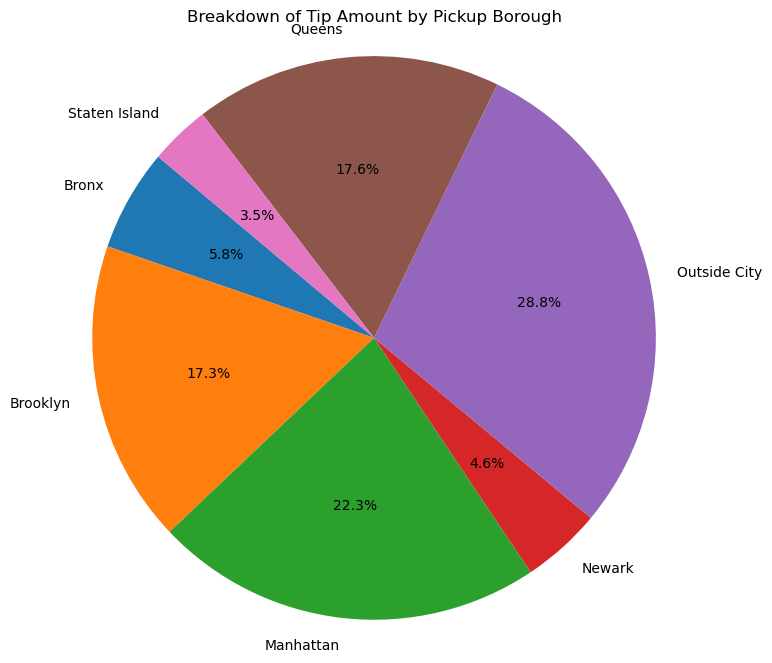

In [59]:
# Group by pickup_location and calculate the total tip amount
tip_by_location = df.groupby('Pickup_Borough')['avg(tip_amount)'].sum().reset_index()

# Plot the breakdown of tip amount by pickup location using a pie chart
plt.figure(figsize=(8, 8))
plt.pie(tip_by_location['avg(tip_amount)'], labels=tip_by_location['Pickup_Borough'], autopct='%1.1f%%', startangle=140)
plt.title('Breakdown of Tip Amount by Pickup Borough')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

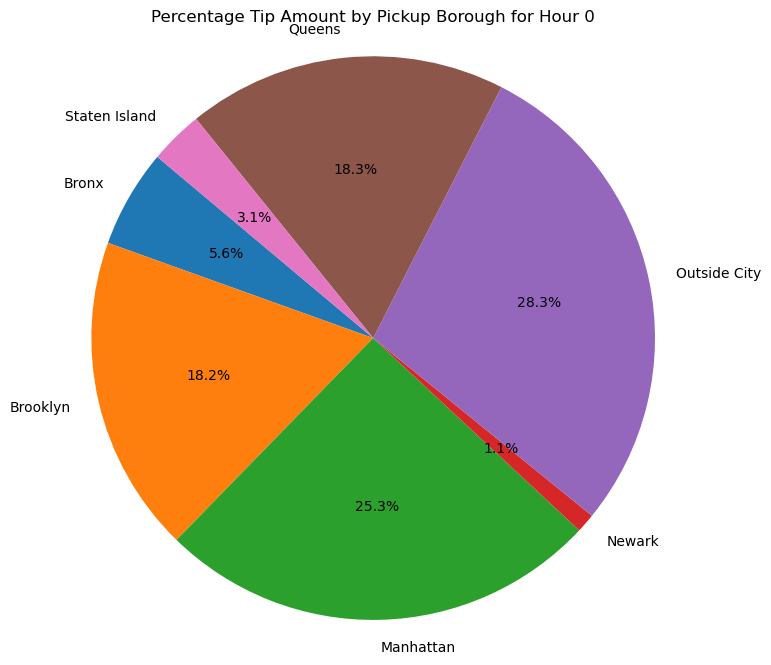

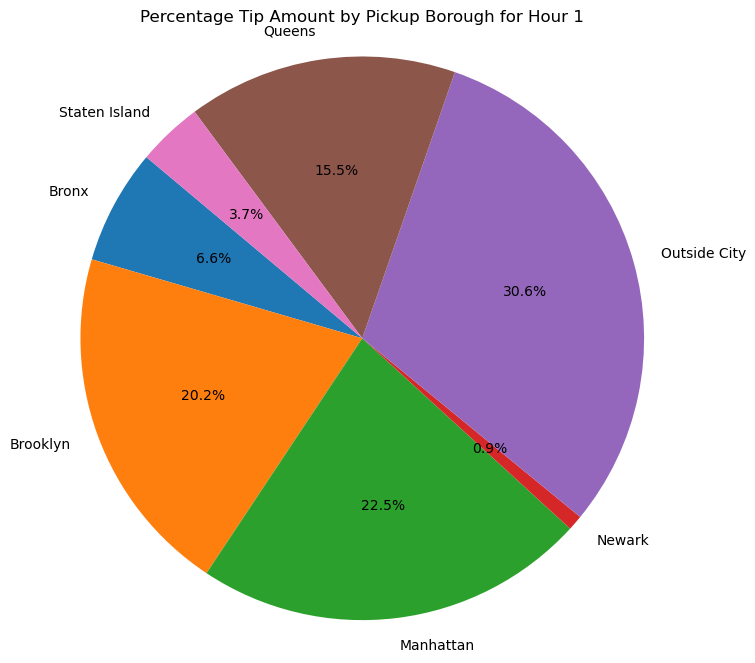

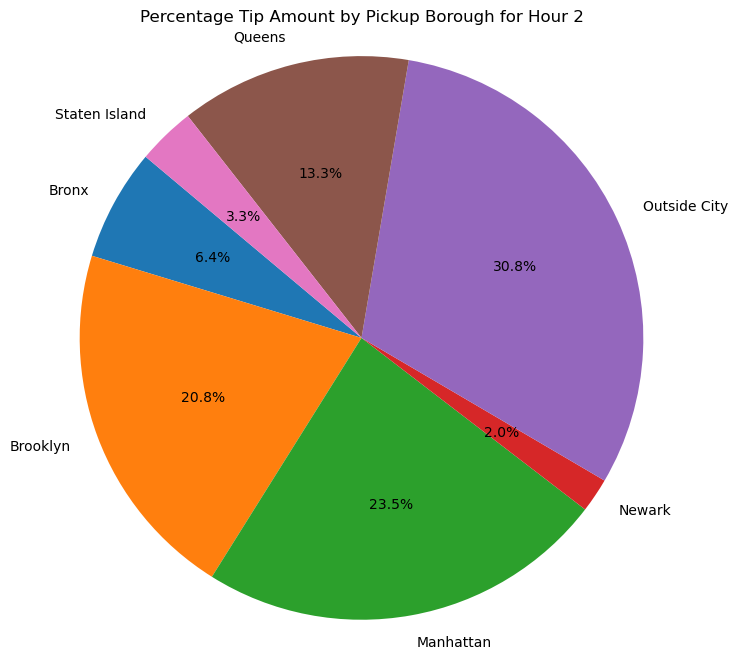

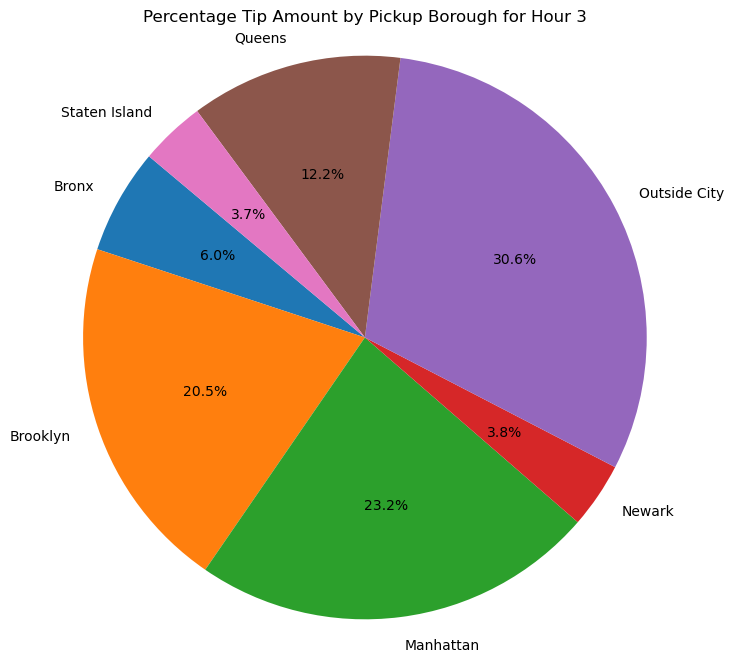

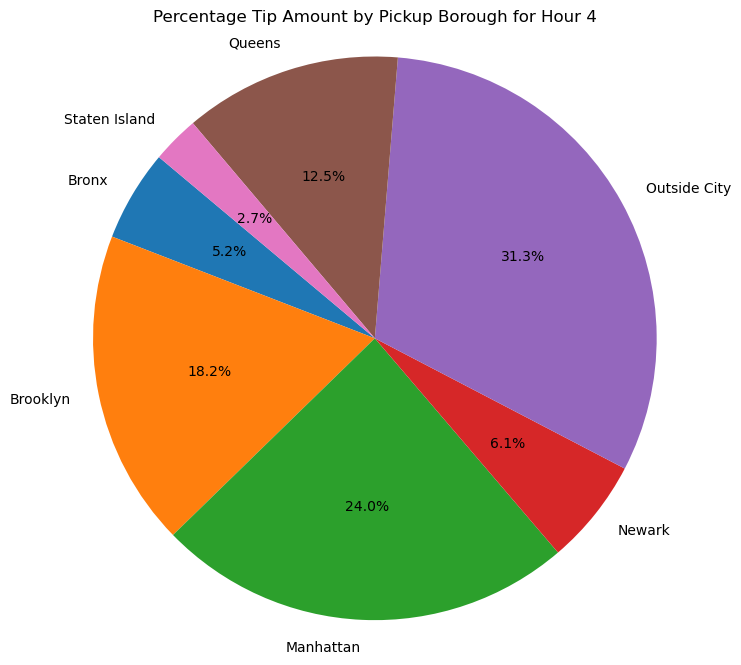

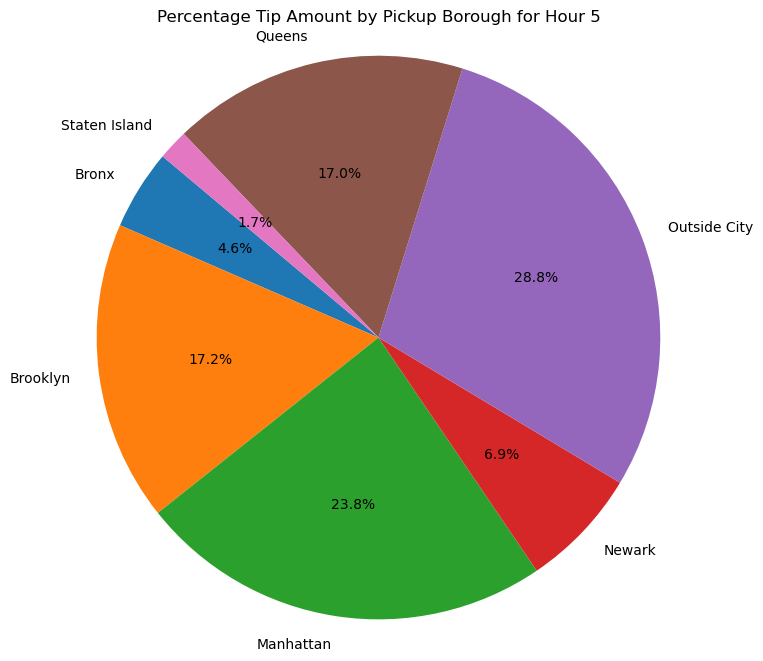

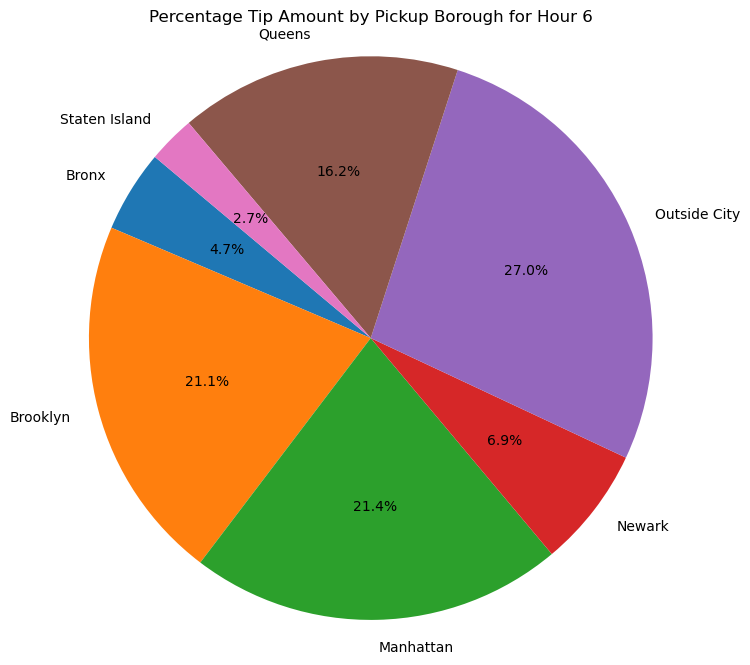

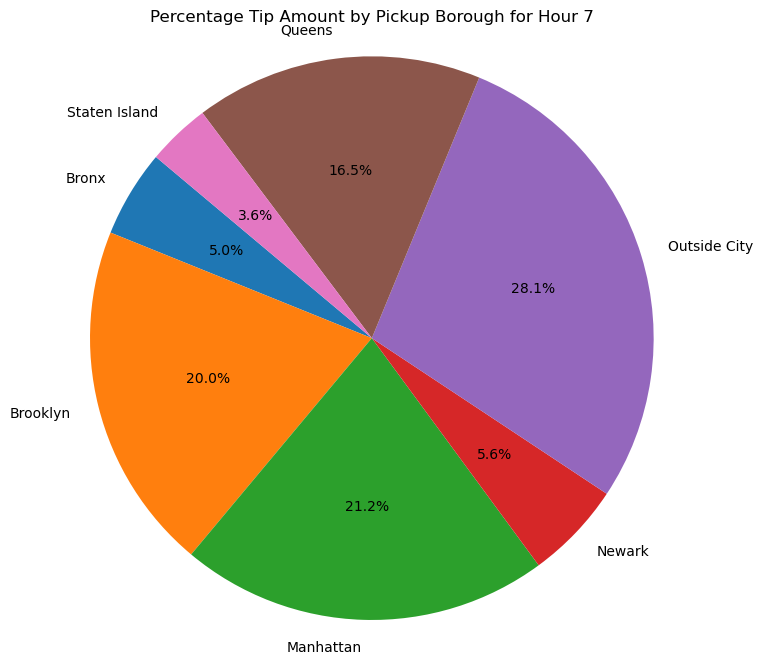

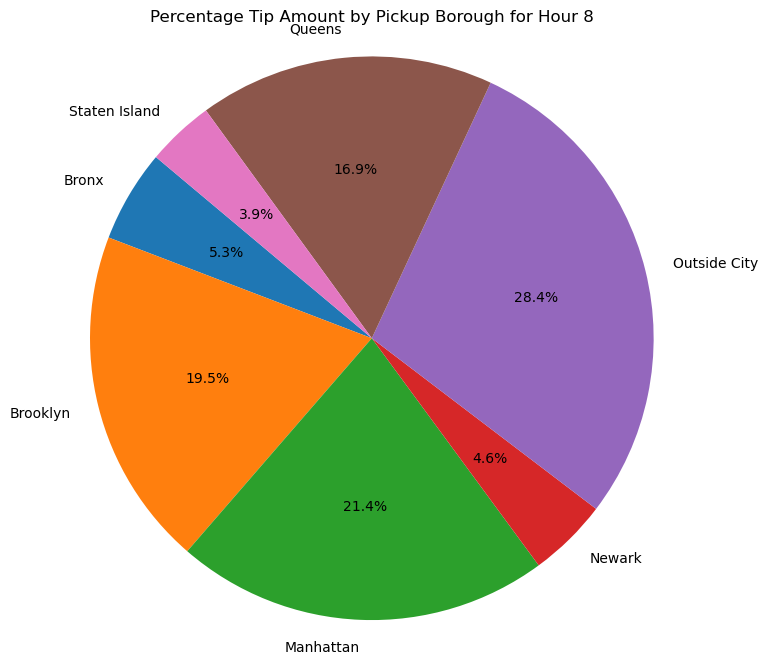

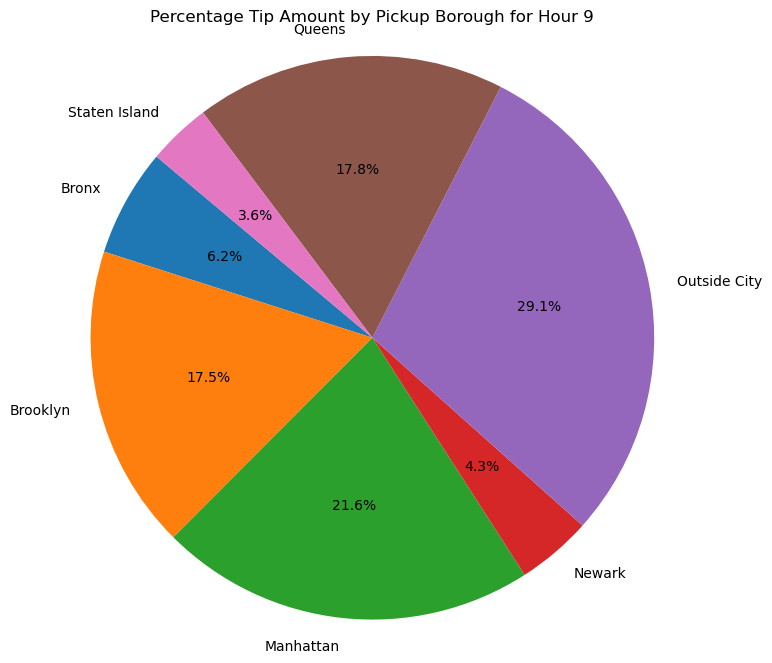

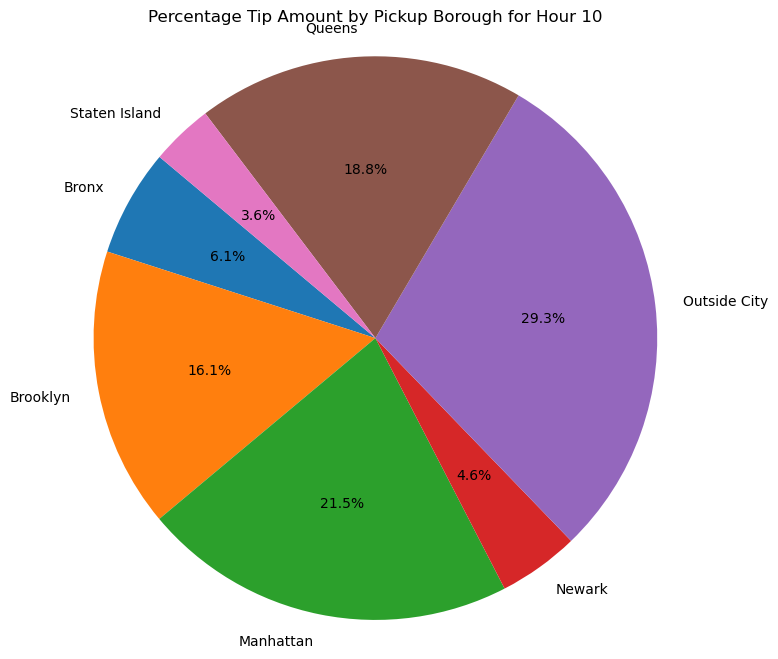

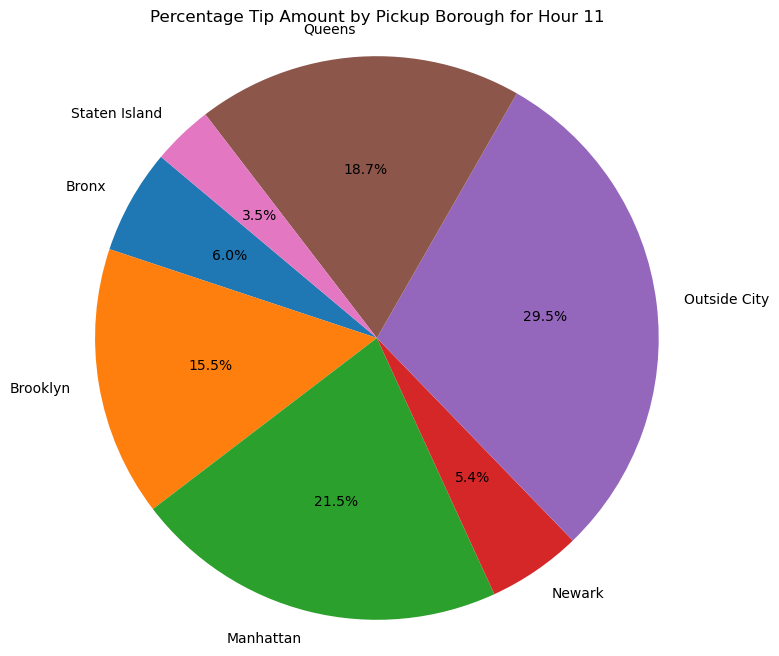

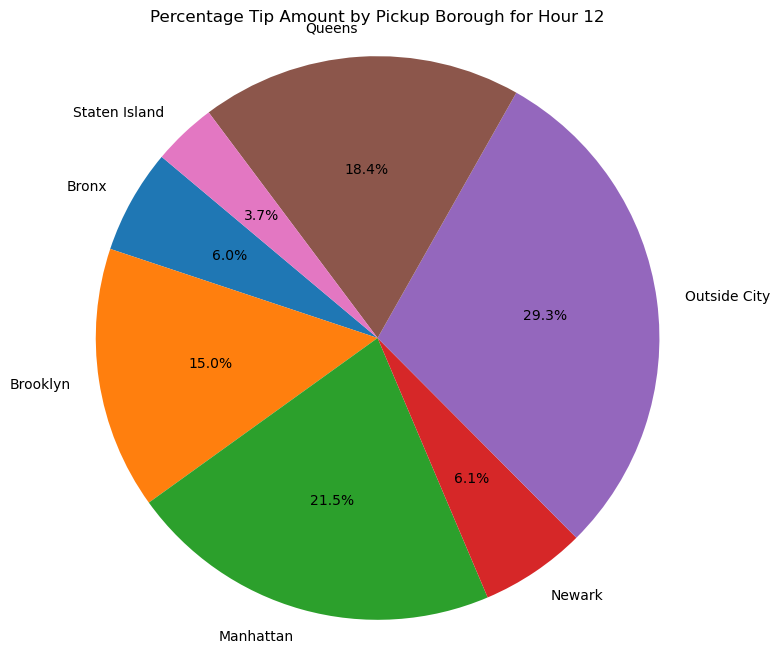

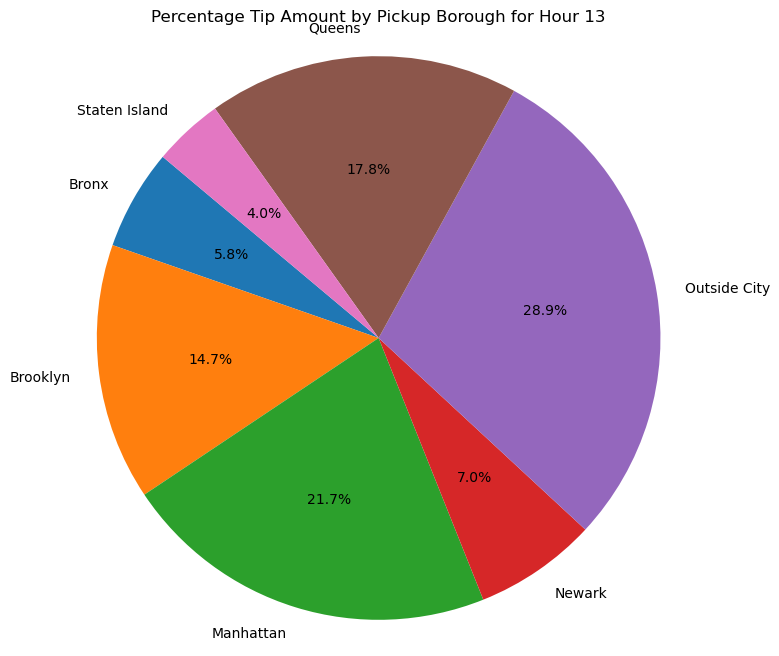

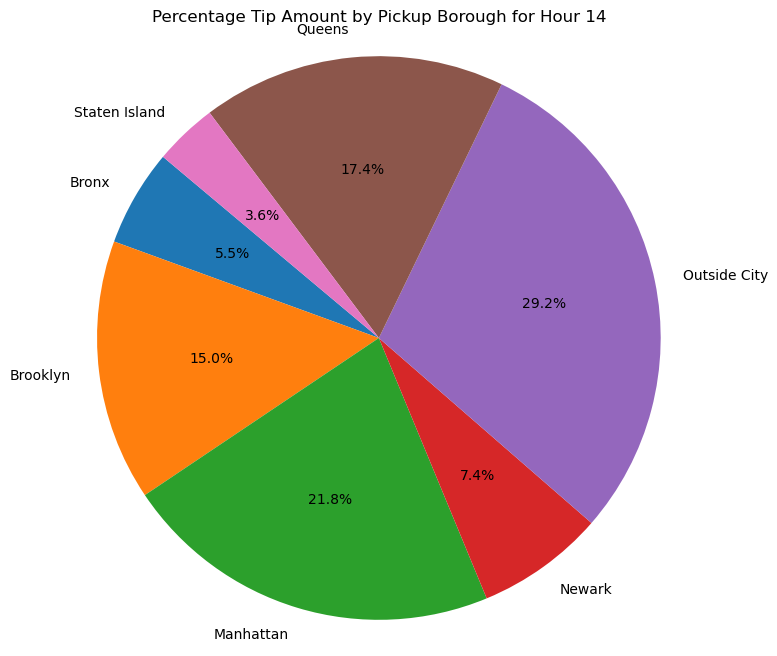

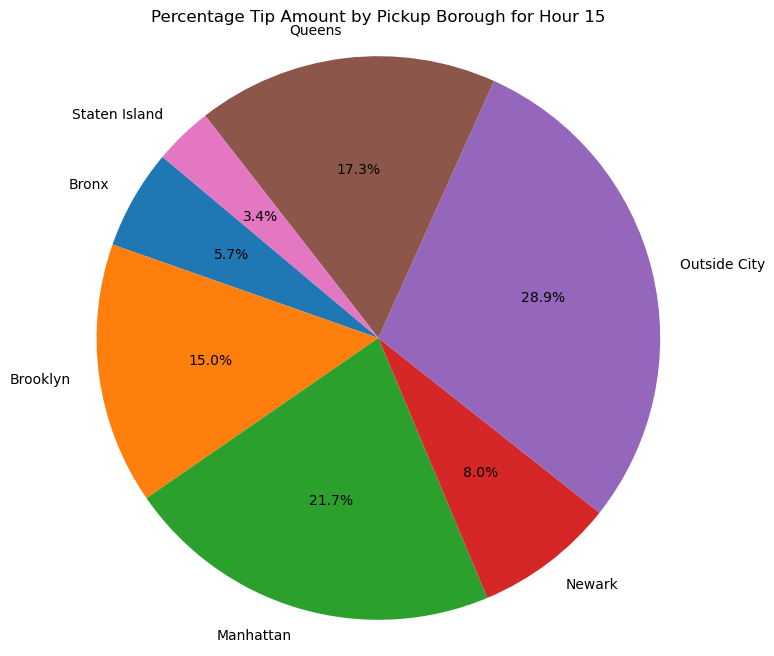

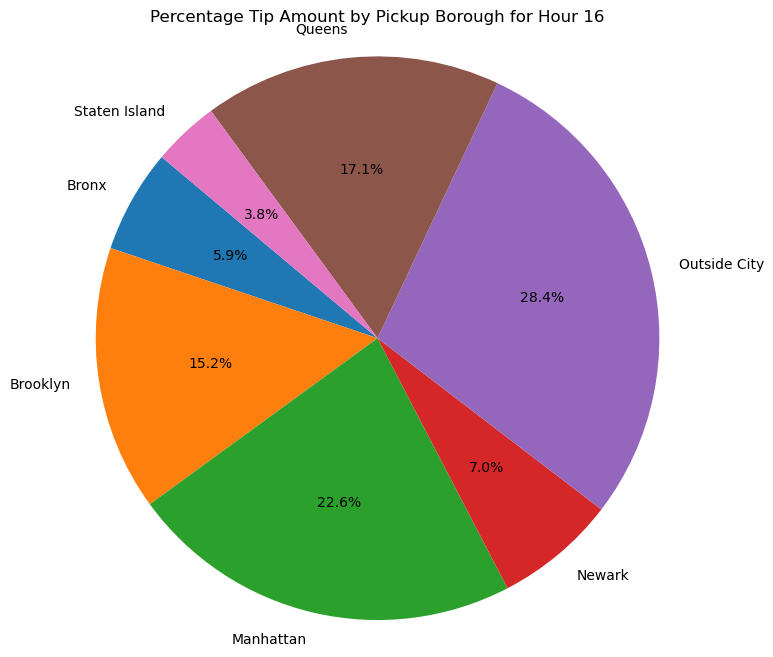

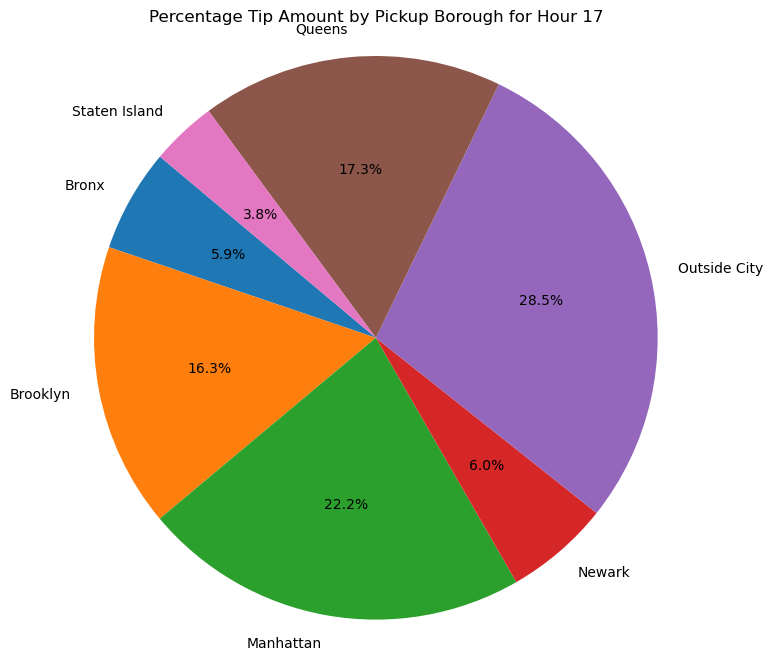

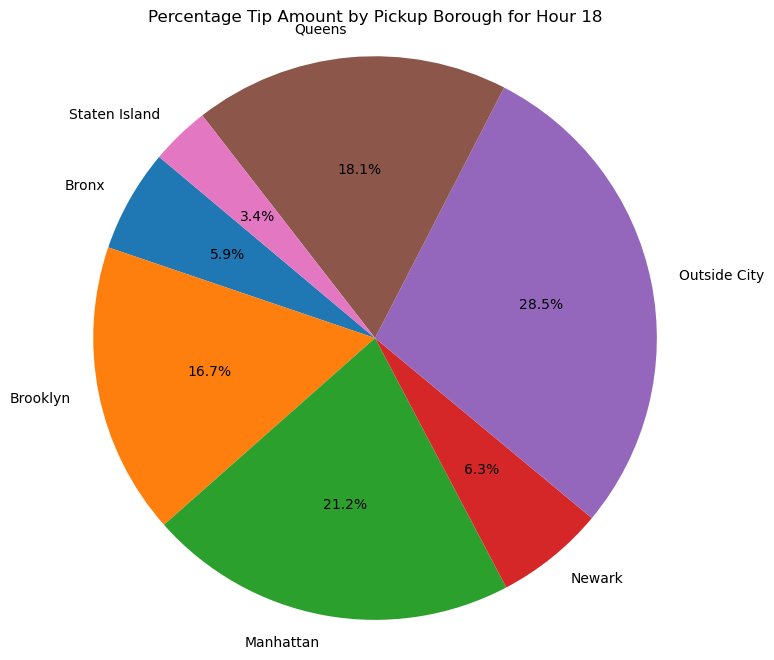

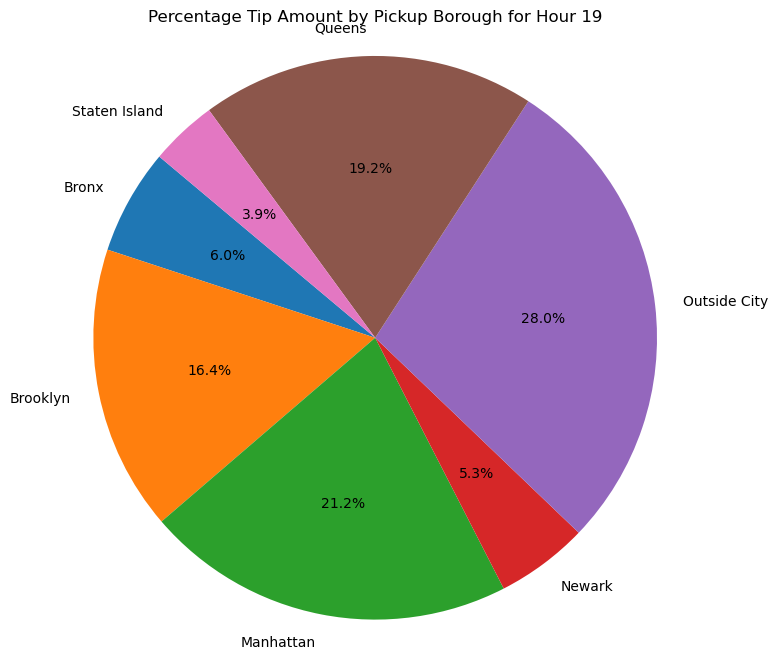

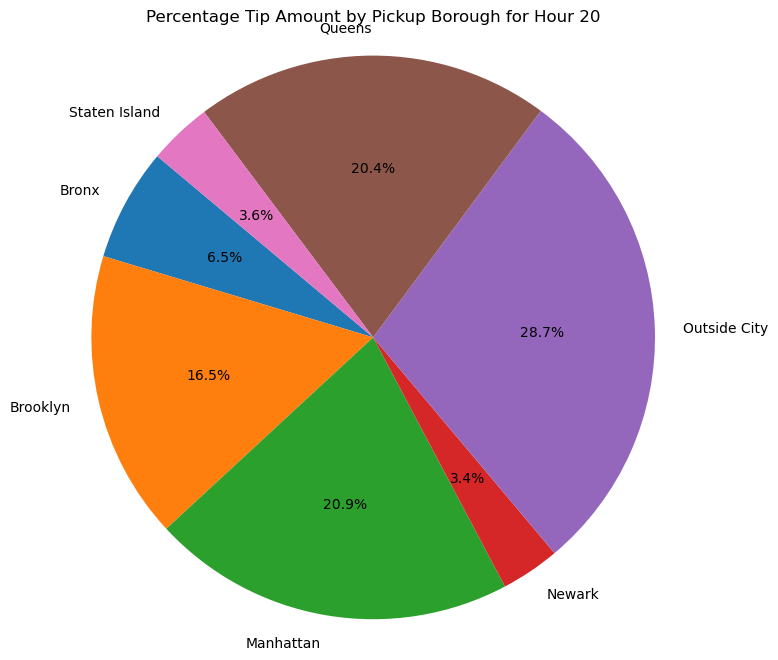

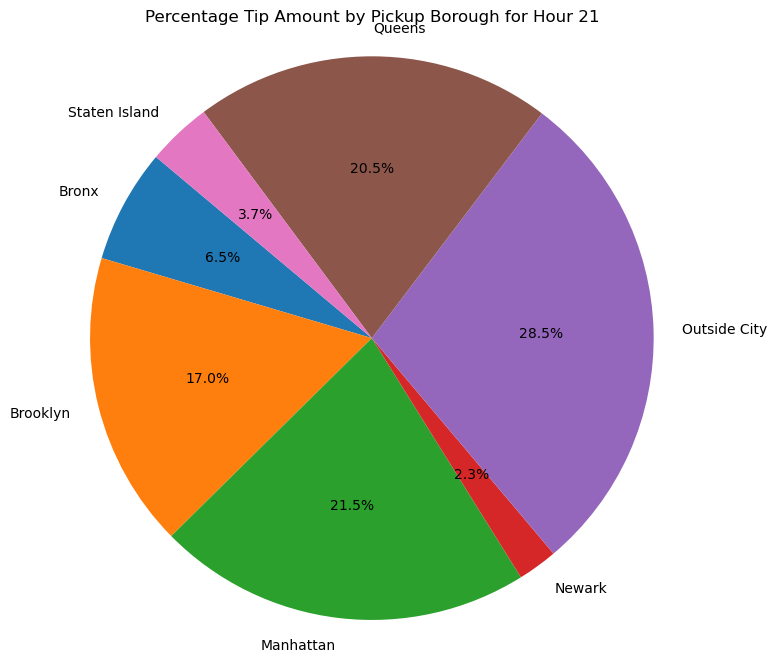

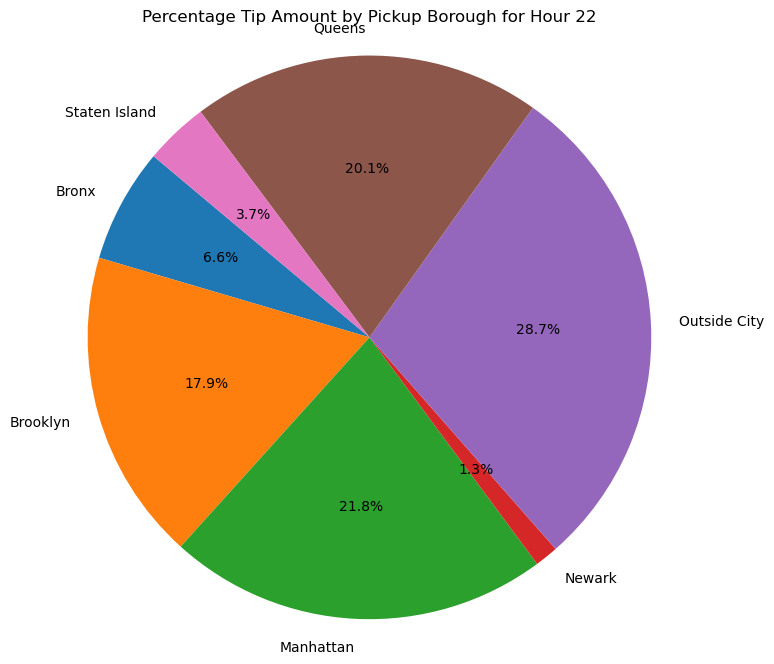

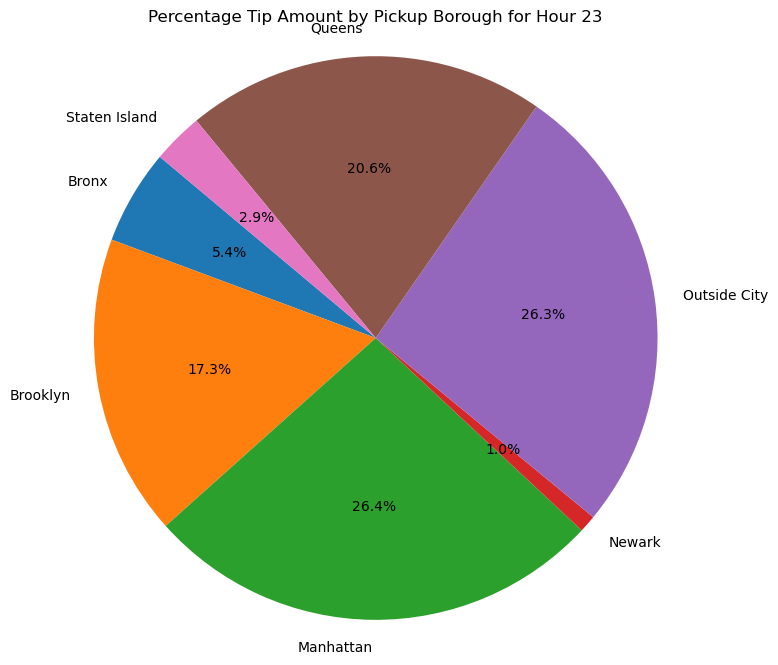

In [62]:
# Group by pickup hour and pickup borough, then calculate the total tip amount
tip_by_hour_borough = df.groupby(['pickup_hour', 'Pickup_Borough'])['avg(tip_amount)'].sum().reset_index()

# Group by pickup hour and calculate the total tip amount for each hour
total_tip_by_hour = df.groupby('pickup_hour')['avg(tip_amount)'].sum().reset_index()

# Merge the two dataframes to get the percentage tip amount at each hour by boroughs contribution
tip_by_hour_borough = tip_by_hour_borough.merge(total_tip_by_hour, on='pickup_hour', suffixes=('_borough', '_total'))
tip_by_hour_borough['tip_percentage'] = (tip_by_hour_borough['avg(tip_amount)_borough'] / tip_by_hour_borough['avg(tip_amount)_total']) * 100

# Plot the pie chart
for hour in tip_by_hour_borough['pickup_hour'].unique():
    data = tip_by_hour_borough[tip_by_hour_borough['pickup_hour'] == hour]
    plt.figure(figsize=(8, 8))
    plt.pie(data['tip_percentage'], labels=data['Pickup_Borough'], autopct='%1.1f%%', startangle=140)
    plt.title(f'Percentage Tip Amount by Pickup Borough for Hour {hour}')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()